Consensus címkék vizsgálata

In [ ]:
import os
import json
import pandas as pd
    
data_path = '/vitmma19-pw-bullflag/data'

json_files = [f for f in os.listdir(f'{data_path}/consensus') if f.endswith('.json')]

def parse_json_file(json_file):
    with open(os.path.join(f'{data_path}/consensus', json_file), 'r') as file:
        data = json.load(file)

    labels_list = []
    for item in data:
        # Determine format
        if 'annotations' in item:
            file_name = item['data']['csv']
            # Remove hash: split by '-' and take from second part
            file_name_clean = '-'.join(file_name.split('-')[1:]) if '-' in file_name else file_name
            for annotation in item['annotations']:
                for result in annotation['result']:
                    label_list = result['value']['timeserieslabels']
                    # Convert list to string (take first if single, or join)
                    label = label_list[0] if len(label_list) == 1 else ' '.join(label_list)
                    start_time = result['value']['start']
                    end_time = result['value']['end']
                    labels_list.append({
                        'annotator': json_file.replace('.json', ''),
                        'file': file_name_clean,
                        'label': label,
                        'start': start_time,
                        'end': end_time
                    })
        elif 'label' in item:
            file_name = item['csv']
            # Remove hash: split by '-' and take from second part
            file_name_clean = '-'.join(file_name.split('-')[1:]) if '-' in file_name else file_name
            for label_entry in item['label']:
                label_list = label_entry['timeserieslabels']
                # Convert list to string (take first if single, or join)
                label = label_list[0] if len(label_list) == 1 else ' '.join(label_list)
                start_time = label_entry['start']
                end_time = label_entry['end']
                labels_list.append({
                    'annotator': json_file.replace('.json', ''),
                    'file': file_name_clean,
                    'label': label,
                    'start': start_time,
                    'end': end_time
                })
        else:
            print(f"Unknown format for item ID: {item.get('id', 'N/A')}")

    return labels_list


labels = []
for jf in json_files:
    labels += parse_json_file(jf)


labels_df = pd.DataFrame(labels)
print(labels_df.head())

  annotator                    file           label             start  \
0    AS76HW  EURUSD_1minute_004.csv  Bearish Normal  2023-10-31 12:03   
1    AS76HW  EURUSD_1minute_004.csv  Bullish Normal  2023-11-13 12:45   
2    AS76HW  EURUSD_1minute_004.csv   Bearish Wedge  2023-11-30 07:05   
3    AS76HW  EURUSD_1minute_004.csv   Bullish Wedge  2023-12-13 17:39   
4    AS76HW  EURUSD_1minute_004.csv  Bearish Normal  2023-10-24 09:23   

                end  
0  2023-11-01 12:55  
1  2023-11-14 20:49  
2  2023-12-01 15:48  
3  2023-12-14 17:13  
4  2023-10-25 11:34  


In [31]:
labels_df['file'].value_counts()

file
EURUSD_1minute_004.csv      195
XAU_30m_data_limited.csv    157
US500_1min_003.csv           38
EURUSD_15min_001.csv         14
EURUSD_5min_002.csv          13
Name: count, dtype: int64

In [ ]:
label_counts = labels_df.groupby(['file', 'label']).size().reset_index(name='count')
print(label_counts)


                        file            label  count
0       EURUSD_15min_001.csv   Bearish Normal      1
1       EURUSD_15min_001.csv  Bearish Pennant      1
2       EURUSD_15min_001.csv   Bullish Normal      7
3       EURUSD_15min_001.csv  Bullish Pennant      3
4       EURUSD_15min_001.csv    Bullish Wedge      2
5     EURUSD_1minute_004.csv   Bearish Normal     42
6     EURUSD_1minute_004.csv  Bearish Pennant     10
7     EURUSD_1minute_004.csv    Bearish Wedge      9
8     EURUSD_1minute_004.csv   Bullish Normal     86
9     EURUSD_1minute_004.csv  Bullish Pennant     12
10    EURUSD_1minute_004.csv    Bullish Wedge     36
11       EURUSD_5min_002.csv   Bearish Normal      3
12       EURUSD_5min_002.csv  Bearish Pennant      1
13       EURUSD_5min_002.csv   Bullish Normal      5
14       EURUSD_5min_002.csv  Bullish Pennant      3
15       EURUSD_5min_002.csv    Bullish Wedge      1
16        US500_1min_003.csv   Bearish Normal      7
17        US500_1min_003.csv  Bearish Pennant 

In [2]:
# Filter to only the loaded CSV files
loaded_files = ['XAU_30m_data_limited.csv', 'EURUSD_1minute_004.csv']
labels_df_filtered = labels_df[labels_df['file'].isin(loaded_files)]

# Example analysis: Count labels per file
label_counts = labels_df_filtered.groupby(['file', 'label']).size().reset_index(name='count')
print(label_counts)

                        file            label  count
0     EURUSD_1minute_004.csv   Bearish Normal     42
1     EURUSD_1minute_004.csv  Bearish Pennant     10
2     EURUSD_1minute_004.csv    Bearish Wedge      9
3     EURUSD_1minute_004.csv   Bullish Normal     86
4     EURUSD_1minute_004.csv  Bullish Pennant     12
5     EURUSD_1minute_004.csv    Bullish Wedge     36
6   XAU_30m_data_limited.csv   Bearish Normal     36
7   XAU_30m_data_limited.csv  Bearish Pennant     15
8   XAU_30m_data_limited.csv    Bearish Wedge     12
9   XAU_30m_data_limited.csv   Bullish Normal     56
10  XAU_30m_data_limited.csv  Bullish Pennant     14
11  XAU_30m_data_limited.csv    Bullish Wedge     24


In [23]:
import matplotlib.pyplot as plt

f1 = pd.read_csv(f'{data_path}/AS76HW/XAU_30m_data_limited.csv')
f2 = pd.read_csv(f'{data_path}/DO1H50/EURUSD_1minute_004.csv')
f1['timestamp'] = pd.to_datetime(f1['timestamp'])
f2['timestamp'] = pd.to_datetime(f2['timestamp'])

annotators = labels_df_filtered['annotator'].unique()
f1_labels = labels_df_filtered[labels_df_filtered['file'] == 'XAU_30m_data_limited.csv']
f2_labels = labels_df_filtered[labels_df_filtered['file'] == 'EURUSD_1minute_004.csv']
print("Annotators:", annotators)

Annotators: ['AS76HW' 'AY1PC8' 'DMQSIV' 'GFTYRV' 'ITWQ3V' 'J2QIYD' 'LMIRPG' 'Q5C0UO'
 'TYEGJ8' 'UZ2DPI' 'W0S0Z6' 'W241KQ' 'XOBJYX' 'XQAR2Z' 'YH6M5S']


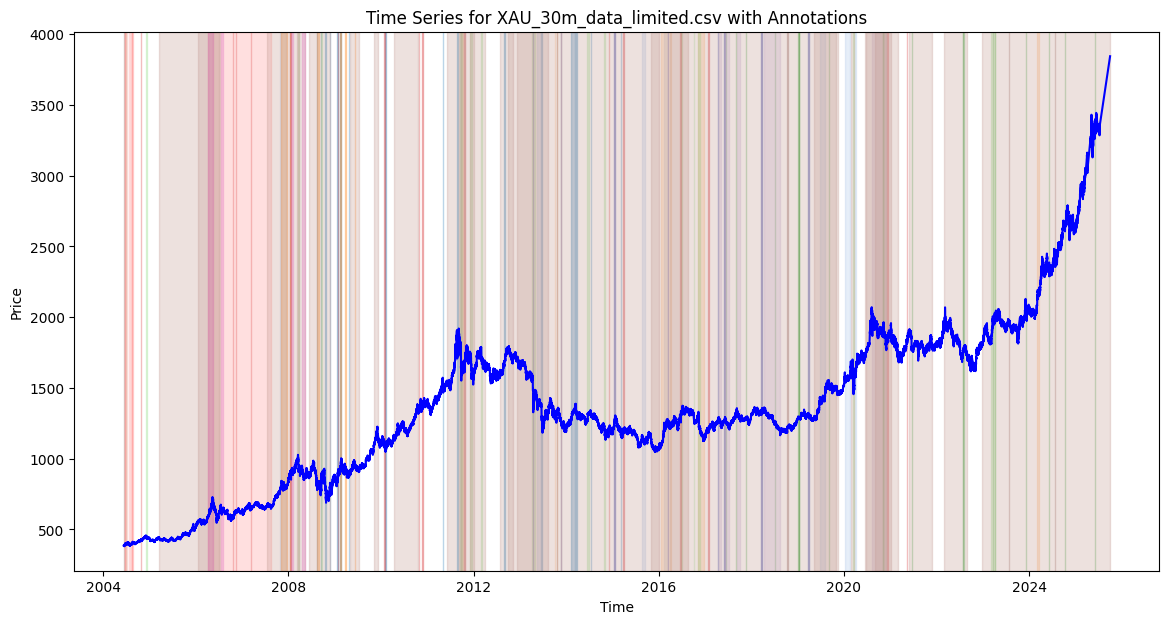

In [30]:
# Function to plot time series with labels
def plot_labels_on_ts(df_ts, labels_df, file_name):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot the time series (adjust column names as needed, e.g., 'close' or 'price')
    ax.plot(df_ts['timestamp'], df_ts['close'], label='Price', color='blue')
    
    # Get unique annotators for color mapping
    annotators = labels_df['annotator'].unique()
    cmap = plt.colormaps.get_cmap('tab20')
    colors = [cmap(i) for i in range(len(annotators))]
    annotator_color = dict(zip(annotators, colors))

    # Overlay labels as shaded regions
    for _, row in labels_df.iterrows():
        start = pd.to_datetime(row['start'])
        end = pd.to_datetime(row['end'])
        label = row['label']
        annotator = row['annotator']
        color = annotator_color[annotator]
        
        # Shade the region
        ax.axvspan(start, end, color=color, alpha=0.3, label=f'{annotator}: {label}')
    
    ax.set_title(f'Time Series for {file_name} with Annotations')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    plt.show()

plot_labels_on_ts(f1, f1_labels, 'XAU_30m_data_limited.csv')

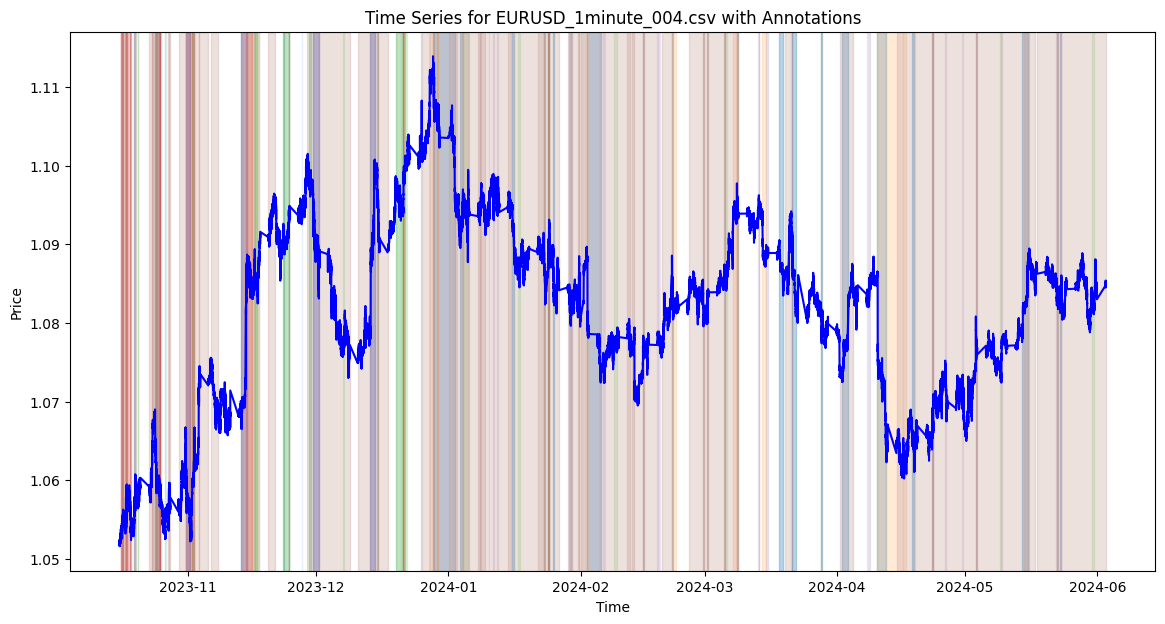

In [35]:
plot_labels_on_ts(f2, f2_labels, 'EURUSD_1minute_004.csv')

In [ ]:
# To analyze overlaps: Calculate intersection durations
def calculate_overlaps(labels_df, file_name):
    file_labels = labels_df[labels_df['file'] == file_name].copy()
    file_labels['start'] = pd.to_datetime(file_labels['start'])
    file_labels['end'] = pd.to_datetime(file_labels['end'])
    
    overlaps = []
    for i, row1 in file_labels.iterrows():
        for j, row2 in file_labels.iterrows():
            if i < j:  # Avoid self-comparison
                start_max = max(row1['start'], row2['start'])
                end_min = min(row1['end'], row2['end'])
                if start_max < end_min:
                    overlap_duration = (end_min - start_max).total_seconds() / 3600  # Hours
                    overlaps.append({
                        'annotator1': row1['annotator'],
                        'annotator2': row2['annotator'],
                        'label1': row1['label'],
                        'label2': row2['label'],
                        'overlap_hours': overlap_duration
                    })
    
    return pd.DataFrame(overlaps)

# Calculate and print overlaps for each file
for file in loaded_files:
    overlaps_df = calculate_overlaps(labels_df_filtered, file)
    print(f"Overlaps for {file}:")
    print(overlaps_df)
    print(f"Total overlap hours: {overlaps_df['overlap_hours'].sum()}")


Overlaps for XAU_30m_data_limited.csv:
    annotator1 annotator2           label1           label2  overlap_hours
0       AS76HW     LMIRPG   Bearish Normal   Bearish Normal           91.5
1       AS76HW     W0S0Z6   Bearish Normal   Bearish Normal           91.5
2       AS76HW     XQAR2Z   Bearish Normal    Bearish Wedge           91.5
3       AS76HW     XQAR2Z   Bearish Normal   Bearish Normal           91.5
4       AS76HW     GFTYRV  Bullish Pennant  Bearish Pennant           27.5
..         ...        ...              ...              ...            ...
179     XQAR2Z     XQAR2Z   Bullish Normal    Bullish Wedge         3373.0
180     XQAR2Z     XQAR2Z   Bullish Normal    Bullish Wedge         4135.5
181     XQAR2Z     XQAR2Z   Bullish Normal    Bullish Wedge         3707.5
182     XQAR2Z     XQAR2Z   Bullish Normal   Bearish Normal         3024.0
183     XQAR2Z     XQAR2Z    Bullish Wedge   Bearish Normal         2007.0

[184 rows x 5 columns]
Total overlap hours: 85607.0
Overlaps

In [48]:
# Add a duration column to the DataFrame
labels_df_filtered['start'] = pd.to_datetime(labels_df_filtered['start'])
labels_df_filtered['end'] = pd.to_datetime(labels_df_filtered['end'])
labels_df_filtered['duration'] = (labels_df_filtered['end'] - labels_df_filtered['start']).dt.total_seconds() / 3600  # Duration in hours

# Inspect the labels with the longest durations
long_durations = labels_df_filtered.sort_values(by='duration', ascending=False)
print("Labels with the longest durations:")
print(long_durations[['annotator', 'file', 'label', 'start', 'end', 'duration']].head(10))

# Filter labels with excessively long durations (e.g., greater than 24 hours)
threshold = 1000
too_long_labels = labels_df_filtered[labels_df_filtered['duration'] > threshold]
print(f"Labels with durations longer than {threshold} hours:")
print(too_long_labels[['annotator', 'file', 'label', 'start', 'end', 'duration']])

Labels with the longest durations:
    annotator                      file            label               start  \
403    XQAR2Z  XAU_30m_data_limited.csv   Bullish Normal 2015-10-30 22:30:00   
402    XQAR2Z  XAU_30m_data_limited.csv   Bearish Normal 2012-12-06 11:30:00   
412    XQAR2Z  XAU_30m_data_limited.csv   Bullish Normal 2022-12-28 20:30:00   
264    TYEGJ8  XAU_30m_data_limited.csv    Bullish Wedge 2006-04-07 03:30:00   
392    XQAR2Z  XAU_30m_data_limited.csv   Bullish Normal 2005-03-14 01:00:00   
401    XQAR2Z  XAU_30m_data_limited.csv    Bearish Wedge 2012-09-27 11:30:00   
388    XQAR2Z  XAU_30m_data_limited.csv  Bullish Pennant 2007-07-19 12:30:00   
407    XQAR2Z  XAU_30m_data_limited.csv   Bullish Normal 2020-06-15 01:00:00   
396    XQAR2Z  XAU_30m_data_limited.csv  Bullish Pennant 2010-04-13 19:30:00   
411    XQAR2Z  XAU_30m_data_limited.csv  Bullish Pennant 2022-03-01 09:30:00   

                    end  duration  
403 2019-11-18 01:00:00   35498.5  
402 2016-01-

In [47]:
long_durations

,annotator,file,label,start,end,duration
403,XQAR2Z,XAU_30m_data_limited.csv,Bullish Normal,2015-10-30 22:30:00,2019-11-18 01:00:00,35498.500000
402,XQAR2Z,XAU_30m_data_limited.csv,Bearish Normal,2012-12-06 11:30:00,2016-01-04 01:00:00,26965.500000
412,XQAR2Z,XAU_30m_data_limited.csv,Bullish Normal,2022-12-28 20:30:00,2025-09-30 19:30:00,24167.000000
264,TYEGJ8,XAU_30m_data_limited.csv,Bullish Wedge,2006-04-07 03:30:00,2007-08-16 21:30:00,11922.000000
392,XQAR2Z,XAU_30m_data_limited.csv,Bullish Normal,2005-03-14 01:00:00,2006-05-16 09:00:00,10280.000000
...,...,...,...,...,...,...
53,AY1PC8,EURUSD_1minute_004.csv,Bullish Normal,2023-10-26 12:34:00,2023-10-26 12:51:00,0.283333
258,TYEGJ8,EURUSD_1minute_004.csv,Bearish Normal,2023-10-17 16:42:00,2023-10-17 16:56:00,0.233333
263,TYEGJ8,EURUSD_1minute_004.csv,Bullish Normal,2023-10-18 08:37:00,2023-10-18 08:50:00,0.216667
256,TYEGJ8,EURUSD_1minute_004.csv,Bullish Normal,2023-10-17 10:01:00,2023-10-17 10:13:00,0.200000


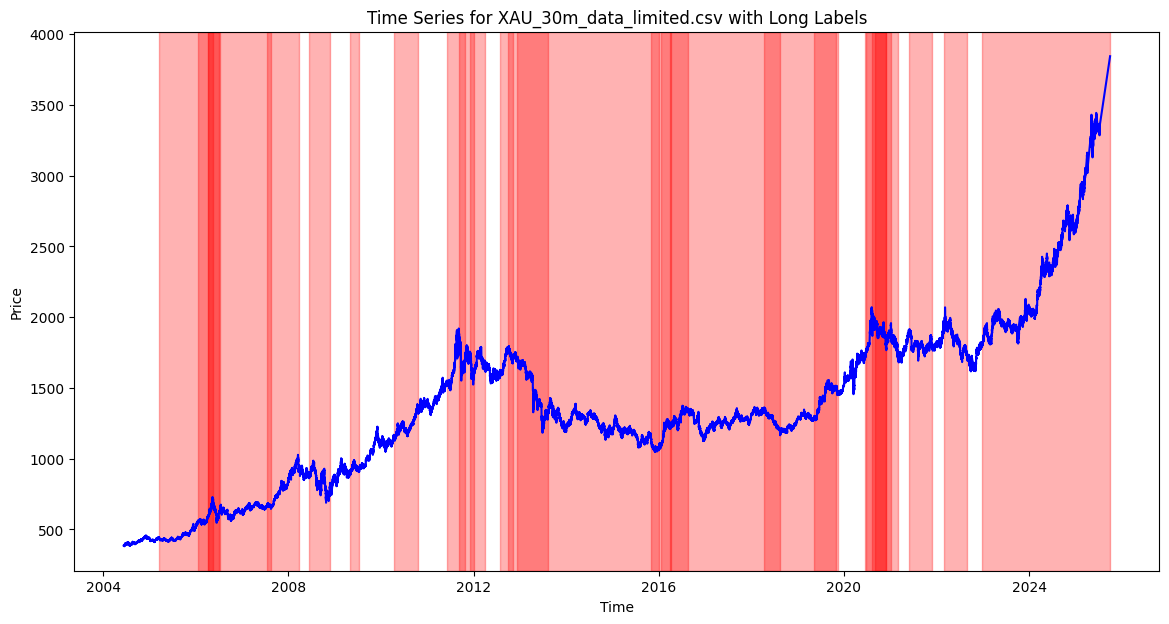

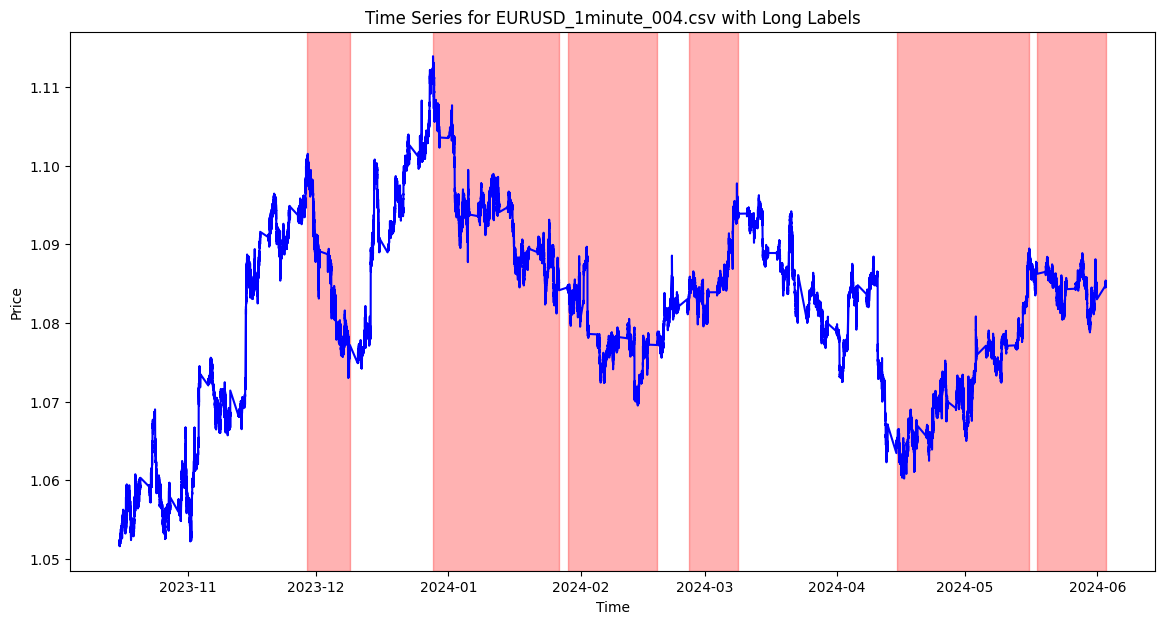

In [46]:
import matplotlib.pyplot as plt

# Define thresholds based on file resolution
thresholds = {
    'XAU_30m_data_limited.csv': 1500,  # 30-minute data
    'EURUSD_1minute_004.csv': 200    # 1-minute data
}

# Function to visualize long labels
def visualize_long_labels(df_ts, long_labels, file_name):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot the time series (adjust column names as needed, e.g., 'close' or 'price')
    ax.plot(df_ts['timestamp'], df_ts['close'], label='Price', color='blue')
    
    # Overlay long labels as shaded regions
    for _, row in long_labels.iterrows():
        start = pd.to_datetime(row['start'])
        end = pd.to_datetime(row['end'])
        label = row['label']
        annotator = row['annotator']
        
        # Shade the region
        ax.axvspan(start, end, color='red', alpha=0.3, label=f'{annotator}: {label}')
    
    ax.set_title(f'Time Series for {file_name} with Long Labels')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    plt.show()

# Visualize long labels for each file
for file in loaded_files:
    file_ts = f1 if file == 'XAU_30m_data_limited.csv' else f2
    file_threshold = thresholds[file]  # Get the threshold for the file
    file_long_labels = labels_df_filtered[
        (labels_df_filtered['file'] == file) & (labels_df_filtered['duration'] > file_threshold)
    ]
    visualize_long_labels(file_ts, file_long_labels, file)

In [ ]:
# --- Hiperparaméter ---
N_BARS_LOOKBACK = 100 # Hány gyertyát nézzünk vissza a rúd kereséséhez

def standardize_pole_starts(all_labels, ohlcv_df):
    """
    Ez a függvény újraszámolja az összes címke 'pole_start_ts' értékét
    a meredekség-maximalizálás elve alapján, figyelmen kívül hagyva
    minden korábbi, inkonzisztens jelölést.

    Args:
        all_labels (list): Címkék listája (pl. dict-ek listája).
                           Minden elemnek tartalmaznia kell:
                           'flag_start_ts', 'flag_end_ts', 'pattern_type'
        ohlcv_df (pd.DataFrame): Az OHLCV adatok, 'timestamp' indexszel.
                                 Oszlopok: 'open', 'high', 'low', 'close', 'volume'

    Returns:
        list: Egy új lista, amely már a konzisztens, újraszámolt
              'pole_start_ts' értékeket tartalmazza.
    """
    
    processed_labels = []

    for label in all_labels:
        try:
            # 1. Horgonypont meghatározása (a zászló kezdete)
            # Keressük meg a zászló kezdő gyertyájának index pozícióját
            flag_start_idx_pos = ohlcv_df.index.get_loc(label['flag_start_ts'], method='nearest')
            flag_start_bar = ohlcv_df.iloc[flag_start_idx_pos]
            
        except KeyError:
            # Ha a timestamp nem található az adatsorban, kihagyjuk a címkét
            print(f"Figyelmeztetés: {label['flag_start_ts']} nem található. Címke kihagyva.")
            continue

        # Változók a legjobb jelölt tárolására
        best_pole_start_ts = None
        max_slope = -float('inf') # Negatív végtelen


        # 2. Keresési ablak iterációja (visszafelé)
        for i in range(1, N_BARS_LOOKBACK + 1):
            candidate_idx_pos = flag_start_idx_pos - i

            # 3. Határok ellenőrzése
            if candidate_idx_pos < 0:
                # Elértük az adatsor elejét, megállunk
                break
                
            candidate_bar = ohlcv_df.iloc[candidate_idx_pos]
            time_bars_elapsed = i # Eltelt idő (gyertyákban)

            price_change = 0.0
            
            # 4. Meredekség számítása típus alapján
            if label['pattern_type'] == "BULL_FLAG":
                # Rúd: Emelkedés. Zászló tetején (high) kezdődik, rúd alján (low) indul.
                anchor_price = flag_start_bar['high']
                candidate_price = candidate_bar['low']
                price_change = anchor_price - candidate_price
                
            elif label['pattern_type'] == "BEAR_FLAG":
                # Rúd: Esés. Zászló alján (low) kezdődik, rúd tetején (high) indul.
                anchor_price = flag_start_bar['low']
                candidate_price = candidate_bar['high']
                price_change = candidate_price - anchor_price # Ez is pozitív lesz esésnél
                
            else:
                # Ismeretlen típus, ugorjunk a következő iterációra
                continue

            # 5. A legjobb jelölt frissítése
            # Csak akkor számolunk, ha a mozgás iránya (price_change) pozitív
            if price_change > 0:
                current_slope = price_change / time_bars_elapsed
                
                if current_slope > max_slope:
                    max_slope = current_slope
                    # Magát a timestampet mentsük el, ne az indexet
                    best_pole_start_ts = candidate_bar.name # .name egy pandas sor indexét (timestampjét) adja vissza

        # 6. Az új, szabványosított címke hozzáadása
        # Csak akkor adjuk hozzá, ha találtunk egy érvényes rudat (nem maradt None)
        if best_pole_start_ts is not None:
            
            new_label = {
                "pattern_type": label['pattern_type'],
                "pole_start_ts": best_pole_start_ts,   # Az ÚJ, kiszámított érték
                "flag_start_ts": label['flag_start_ts'], # A RÉGI, megbízható érték
                "flag_end_ts": label['flag_end_ts'],     # A RÉGI, megbízható érték
                "calculated_slope": max_slope        # Opcionális, szűréshez/elemzéshez
            }
            processed_labels.append(new_label)

    return processed_labels

 

# --- Használat ---


# 1. Töltsd be az adataidat (feltételezett függvények)
# all_my_labels = load_my_inconsistent_labels() 
# ohlcv_dataframe = load_my_ohlcv_data() 
# ohlcv_dataframe.set_index('timestamp', inplace=True) # Fontos, hogy az index a timestamp legyen!


# 2. Futtasd a szabványosítást
# clean_labels = standardize_pole_starts(all_my_labels, ohlcv_dataframe)


# print(f"Eredeti címkék száma: {len(all_my_labels)}")
# print(f"Szabványosított, érvényes címkék száma: {len(clean_labels)}")
